In [9]:
#1- Workinng with code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

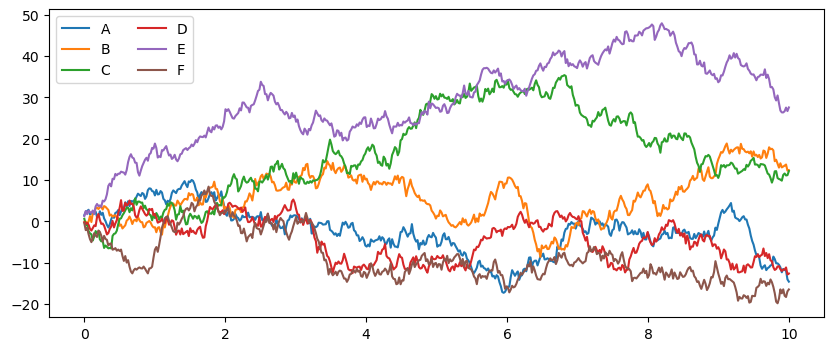

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [10]:
#2 - Interacting with data. Cryptocurrencies prices from public API

In [11]:
import requests
import pandas as pd

In [18]:
def get_historic_price(symbol, exchange='bitfinex', after='2020-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
         symbol= symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [19]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-07-12 14:05:36.412828')

In [21]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [31]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,30376.959302,30438.337209,30306.633721,30373.552326,72.679857,2.215709e+06
std,432.999012,450.651150,424.668332,434.336844,89.903144,2.761190e+06
min,29702.000000,29812.000000,29521.000000,29705.000000,1.365698,4.083563e+04
25%,30122.500000,30183.000000,30047.750000,30120.000000,22.164107,6.723037e+05
50%,30299.500000,30328.000000,30272.000000,30298.500000,40.444863,1.219841e+06
75%,30383.500000,30422.000000,30346.250000,30384.000000,83.918484,2.618811e+06
max,31637.000000,31818.000000,31422.000000,31637.000000,561.671542,1.709718e+07


In [28]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [32]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,1924.253488,1929.323837,1919.251744,1924.459884,307.756658,5.956260e+05
std,36.703123,37.734317,36.046621,36.599961,648.988073,1.260924e+06
min,1865.700000,1868.600000,1863.100000,1866.200000,14.744840,2.776901e+04
25%,1898.975000,1906.775000,1893.275000,1900.125000,69.944160,1.349161e+05
50%,1922.100000,1928.900000,1914.350000,1922.900000,128.192307,2.463758e+05
75%,1934.275000,1938.700000,1931.100000,1934.250000,265.987210,4.992889e+05
max,2023.400000,2029.500000,2012.200000,2024.800000,5501.573727,1.059098e+07


In [24]:
btc.head() #Informacion por hora

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-07-12 15:00:00,30662,30832,30659,30738,148.421652,4.568673e+06
2023-07-12 16:00:00,30746,30805,30476,30509,117.600186,3.596702e+06
2023-07-12 17:00:00,30507,30527,30425,30475,42.529833,1.295782e+06
2023-07-12 18:00:00,30483,30517,30425,30441,36.386821,1.108522e+06
2023-07-12 19:00:00,30445,30536,30431,30519,13.265311,4.045721e+05


<Axes: xlabel='CloseTime'>

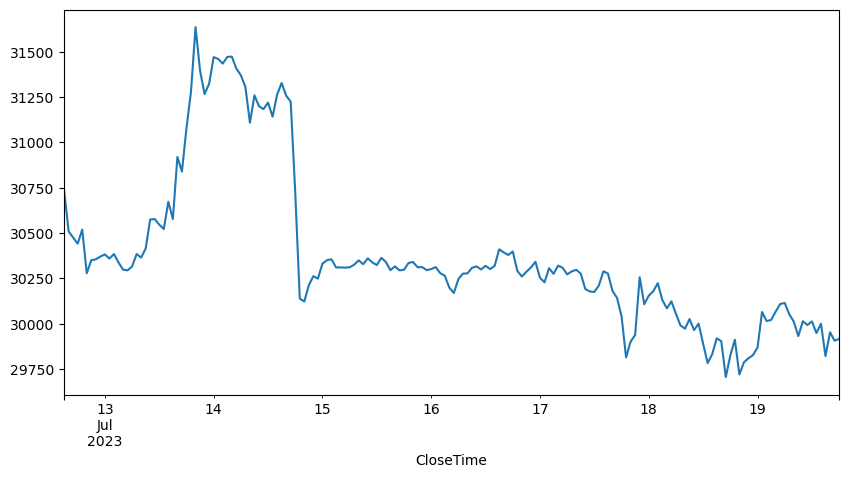

In [25]:
btc['ClosePrice'].plot(figsize=(10, 5))

In [29]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-07-12 15:00:00,1887.0,1899.6,1887.0,1893.1,385.746239,7.309450e+05
2023-07-12 16:00:00,1893.3,1901.7,1881.2,1883.6,595.102556,1.125561e+06
2023-07-12 17:00:00,1883.5,1885.5,1878.6,1885.2,377.934035,7.111800e+05
2023-07-12 18:00:00,1885.4,1891.3,1884.1,1887.1,117.742289,2.222673e+05
2023-07-12 19:00:00,1887.0,1890.3,1885.0,1887.7,86.670875,1.636067e+05


<Axes: xlabel='CloseTime'>

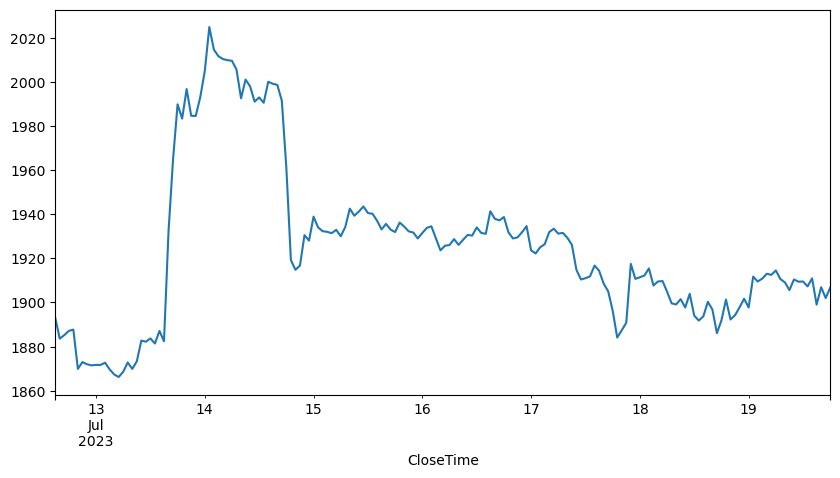

In [30]:
eth['ClosePrice'].plot(figsize=(10, 5))

In [33]:
#3 - Dynamic plots with Bokeh

In [34]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [35]:
output_notebook()

Loading BokehJS ...

In [37]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = 'top_left'
show(p1)


In [38]:
#4 - Exporting to Excel Puede trajar formatos a csv o json tambien

In [39]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [44]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [45]:
eth.to_excel(writer, sheet_name='Ether')

In [46]:
writer.save()

/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_1226/934276808.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
